In [3]:
%run imports.py

3 views, 90 frames
img_shape_xy: (1280, 720)


# USE SIFT MATCH RANSACE TO FIND HOMOGRAPHY BETWEEN FRAMES. THEN FIND CAMERA DOF CHANGES

In [88]:
img1, img2 = loader.load_data_imgs(VID_ROOT, [1], [7,10])[0]
img1 = img_proc.to_uint8(img1.mean(axis=-1))
img2 = img_proc.to_uint8(img2.mean(axis=-1))

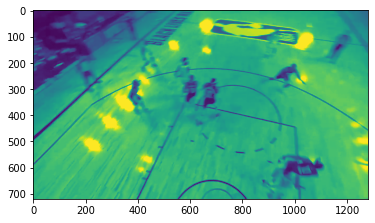

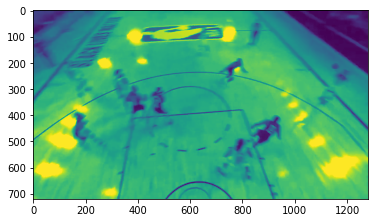

In [89]:
plt.imshow(img1);plt.show()
plt.imshow(img2);plt.show()

In [90]:
MIN_MATCH_COUNT = 10


sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1,des2,k=2)

# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)
        
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()

    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)

    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

else:
    print("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))
    matchesMask = None

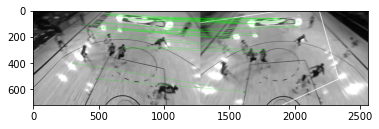

(<matplotlib.image.AxesImage at 0x7f618b618490>, None)

In [91]:
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)

img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)

plt.imshow(img3, 'gray'),plt.show()

In [92]:
M

array([[   1.70528611,    0.42366738, -613.87186292],
       [  -0.19516265,    1.37673365,  186.52078243],
       [   0.00058493,    0.00003624,    1.        ]])

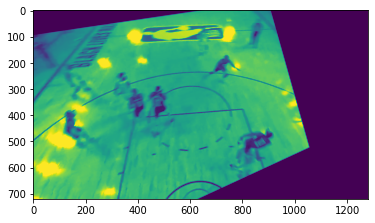

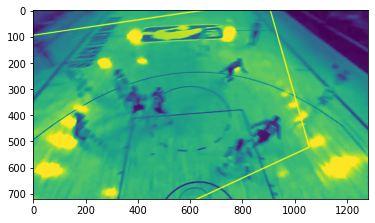

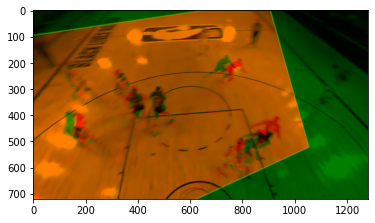

In [93]:
img1p = cv2.warpPerspective(img1, M, dsize=img1.shape[:2][::-1])
plt.imshow(img1p);plt.show()

plt.imshow(img2);plt.show()


img3 = np.zeros(img_shape_yx+(3,), dtype=np.uint8)
img3[..., 0] = img1p;img3[..., 1] = img2/2
plt.imshow(img3)

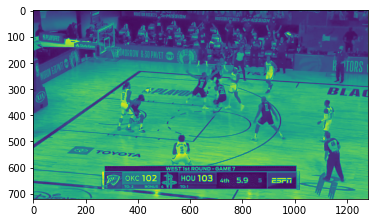

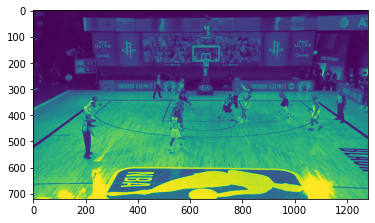

In [44]:
img1, img2 = loader.load_data_imgs(VID_ROOT, [0, 2], [0])[:, 0]
img1 = img_proc.to_uint8(img1.mean(axis=-1))
img2 = img_proc.to_uint8(img2.mean(axis=-1))

plt.imshow(img1);plt.show()
plt.imshow(img2)

# IN BETWEEN VIEWS DOES NOT WORK

In [47]:
MIN_MATCH_COUNT = 10


sift = cv2.SIFT_create(100000)

kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1,des2,k=2)

# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)
        
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    M, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()

    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv2.perspectiveTransform(pts,M)

    img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

else:
    print("Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT))
    matchesMask = None

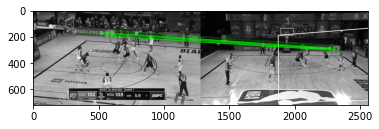

(<matplotlib.image.AxesImage at 0x7f61904ae910>, None)

In [48]:
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)

img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)

plt.imshow(img3, 'gray'),plt.show()